<a href="https://colab.research.google.com/github/austin-ash/CS_167_Classwork/blob/main/Notebook3_Ash.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Notebook #3
**Due**: 9/28/21 by 11:59 pm.

**Name**: 

Be sure to start with the subset that you used in Notebook #2.
- Only rows with 'Fuel Type' as `regular`.
- the `displ`, `cylinders`, `year`, and `comb08` columns.


In [104]:
import pandas
import numpy
from google.colab import drive 
drive.mount('/content/drive')
data = pandas.read_csv('/content/drive/MyDrive/CS167/datasets/vehicles.csv')
data.head()

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (70,71,72,73,74,76,79) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,barrels08,barrelsA08,charge120,charge240,city08,city08U,cityA08,cityA08U,cityCD,cityE,cityUF,co2,co2A,co2TailpipeAGpm,co2TailpipeGpm,comb08,comb08U,combA08,combA08U,combE,combinedCD,combinedUF,cylinders,displ,drive,engId,eng_dscr,feScore,fuelCost08,fuelCostA08,fuelType,fuelType1,ghgScore,ghgScoreA,highway08,highway08U,highwayA08,highwayA08U,highwayCD,highwayE,...,id,lv2,lv4,make,model,mpgData,phevBlended,pv2,pv4,range,rangeCity,rangeCityA,rangeHwy,rangeHwyA,trany,UCity,UCityA,UHighway,UHighwayA,VClass,year,youSaveSpend,guzzler,trans_dscr,tCharger,sCharger,atvType,fuelType2,rangeA,evMotor,mfrCode,c240Dscr,charge240b,c240bDscr,createdOn,modifiedOn,startStop,phevCity,phevHwy,phevComb
0,15.695714,0.0,0.0,0.0,19,0.0,0,0.0,0.0,0.0,0.0,-1,-1,0.0,423.190476,21,0.0,0,0.0,0.0,0.0,0.0,4.0,2.0,Rear-Wheel Drive,9011,(FFS),-1,1850,0,Regular,Regular Gasoline,-1,-1,25,0.0,0,0.0,0.0,0.0,...,1,0,0,Alfa Romeo,Spider Veloce 2000,Y,False,0,0,0,0.0,0.0,0.0,0.0,Manual 5-spd,23.3333,0.0,35.0000,0.0,Two Seaters,1985,-2000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,Tue Jan 01 00:00:00 EST 2013,Tue Jan 01 00:00:00 EST 2013,NaN,0,0,0
1,29.964545,0.0,0.0,0.0,9,0.0,0,0.0,0.0,0.0,0.0,-1,-1,0.0,807.909091,11,0.0,0,0.0,0.0,0.0,0.0,12.0,4.9,Rear-Wheel Drive,22020,(GUZZLER),-1,3500,0,Regular,Regular Gasoline,-1,-1,14,0.0,0,0.0,0.0,0.0,...,10,0,0,Ferrari,Testarossa,N,False,0,0,0,0.0,0.0,0.0,0.0,Manual 5-spd,11.0000,0.0,19.0000,0.0,Two Seaters,1985,-10250,T,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,Tue Jan 01 00:00:00 EST 2013,Tue Jan 01 00:00:00 EST 2013,NaN,0,0,0
2,12.207778,0.0,0.0,0.0,23,0.0,0,0.0,0.0,0.0,0.0,-1,-1,0.0,329.148148,27,0.0,0,0.0,0.0,0.0,0.0,4.0,2.2,Front-Wheel Drive,2100,(FFS),-1,1450,0,Regular,Regular Gasoline,-1,-1,33,0.0,0,0.0,0.0,0.0,...,100,0,0,Dodge,Charger,Y,False,0,0,0,0.0,0.0,0.0,0.0,Manual 5-spd,29.0000,0.0,47.0000,0.0,Subcompact Cars,1985,0,NaN,SIL,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,Tue Jan 01 00:00:00 EST 2013,Tue Jan 01 00:00:00 EST 2013,NaN,0,0,0
3,29.964545,0.0,0.0,0.0,10,0.0,0,0.0,0.0,0.0,0.0,-1,-1,0.0,807.909091,11,0.0,0,0.0,0.0,0.0,0.0,8.0,5.2,Rear-Wheel Drive,2850,NaN,-1,3500,0,Regular,Regular Gasoline,-1,-1,12,0.0,0,0.0,0.0,0.0,...,1000,0,0,Dodge,B150/B250 Wagon 2WD,N,False,0,0,0,0.0,0.0,0.0,0.0,Automatic 3-spd,12.2222,0.0,16.6667,0.0,Vans,1985,-10250,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,Tue Jan 01 00:00:00 EST 2013,Tue Jan 01 00:00:00 EST 2013,NaN,0,0,0
4,17.347895,0.0,0.0,0.0,17,0.0,0,0.0,0.0,0.0,0.0,-1,-1,0.0,467.736842,19,0.0,0,0.0,0.0,0.0,0.0,4.0,2.2,4-Wheel or All-Wheel Drive,66031,"(FFS,TRBO)",-1,2550,0,Premium,Premium Gasoline,-1,-1,23,0.0,0,0.0,0.0,0.0,...,10000,0,14,Subaru,Legacy AWD Turbo,N,False,0,90,0,0.0,0.0,0.0,0.0,Manual 5-spd,21.0000,0.0,32.0000,0.0,Compact Cars,1993,-5500,NaN,NaN,T,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,Tue Jan 01 00:00:00 EST 2013,Tue Jan 01 00:00:00 EST 2013,NaN,0,0,0


In [105]:
# Make your subset here.
subset =  data[(data['fuelType']=='Regular')][['year', 'cylinders', 'displ', 'comb08']]
subset.head()

,year,cylinders,displ,comb08
0,1985,4.0,2.0,21
1,1985,12.0,4.9,11
2,1985,4.0,2.2,27
3,1985,8.0,5.2,11
5,1993,4.0,1.8,22


## Exercise #1

Modify your code from Notebook #2/class to use cross validation. 
- Don't forget that you're doing **regression**--pay attention to what you need to change to make this do regression rather than classification
- make sure to implement an appropriate **regression metric** - you can use any of the ones we talked about in class, but code it up yourself. Avoid using for loops in your calculation, they're unnecesary.
- The sample code uses the word 'classification' a lot in the name of things... make sure you use the word 'regression' instead if you write similar functions.
- your code should be clear and readable.


In [106]:
# Finding columns with missing data
pandas.set_option('display.max_rows', None)
test = subset.isna().any()
test
# Missing data in columns: 'cylinders', 'displ'

year         False
cylinders     True
displ         True
comb08       False
dtype: bool

In [107]:
# fill missing data here
cylinders_mean = subset['cylinders'].mean()
displ_mean = subset['displ'].mean()

subset['cylinders'].fillna(cylinders_mean, inplace=True)
subset['displ'].fillna(displ_mean, inplace=True)

In [108]:
# Finding columns with missing data
test1 = subset.isna().any()
test1
# Missing data has been successfully filled

year         False
cylinders    False
displ        False
comb08       False
dtype: bool

In [109]:
#shuffle the data - "sampling" the full set in random order
shuffled_data = subset.sample(frac=1, random_state=41)

In [110]:
# Implementing regression statistic
def mean_absolute_error(actual,predicted):
    #get the series comparing the two series
    difference = abs(actual - predicted)
    MAE = numpy.sum(difference)/len(difference)
    return MAE

In [111]:
# Testing MAE function
# Result should return 2/3

Actual = numpy.array([3,5,9])
Predicted = numpy.array([2,5,8])

if mean_absolute_error(Actual,Predicted) == 2/3:
  print("Function is working correctly")
else:
  print("Not Working")

Function is working correctly


# Exercise #2
Use approximately the first 500 rows in the shuffled set as testing data. Feel free to use fewer examples in your testing set-- particulary if it takes a long time ro run on your computer (more than 1 min or so).

In [112]:
#Use the first 500 rows as testing data-- train with the rest
test_data = shuffled_data.iloc[0:500]
train_data = shuffled_data.iloc[500:]

In [113]:
def regression_kNN(new_example,train_data,k):
    #getting a copy of the training set just so we don't
    #mess up the original
    train_data_copy = train_data.copy()
    train_data_copy['distance_to_new'] = numpy.sqrt(
        (new_example['year']-train_data['year'])**2
        +(new_example['cylinders']-train_data['cylinders'])**2
        +(new_example['displ']-train_data['displ'])**2)
    
    sorted_data = train_data_copy.sort_values(['distance_to_new'])
    #mean to get the predicted value
    prediction = sorted_data.iloc[0:k]['comb08'].mean()
    return prediction

In [114]:
def regression_all_kNN(test_data,train_data,k):
    #apply the regression_kNN function to each item in the test data with the train
    #data and k passed as the other two arguments. The result will be...

    #a series of the individual results.
    return test_data.apply(regression_kNN,args=(train_data,k),axis=1)

In [115]:
predictions5NN = regression_all_kNN(test_data,train_data,5)
print('ACTUAL\t\tPREDICTIONS')
for i in range(500):
    print(test_data['comb08'].iloc[i], "            ", predictions5NN.iloc[i] )

MAE = mean_absolute_error(test_data['comb08'],predictions5NN)
print("Mean Absolute Error: ", MAE)

ACTUAL		PREDICTIONS
21              19.8
22              23.2
15              16.8
27              23.2
24              24.4
29              25.4
19              21.2
14              13.2
18              20.4
22              23.4
18              18.4
17              15.8
12              12.2
22              28.6
18              16.2
16              18.6
18              19.0
21              20.8
12              14.8
13              18.0
27              24.0
22              23.4
19              20.8
14              13.6
21              19.4
26              26.0
21              21.6
31              33.2
21              20.4
17              18.2
24              23.6
13              16.4
19              23.4
19              17.4
22              20.4
17              16.8
16              16.6
14              14.2
17              19.6
20              23.6
22              21.8
18              18.0
33              39.4
22              20.8
22              21.4
27              24.4
18            

## Exercise #3
Test your model using several different values of k and **graphically show the results.**

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (70,71,72,73,74,76,79) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


[2.276, 1.9393333333333334, 1.8351999999999997, 1.8206666666666664, 1.7672, 1.809333333333333, 1.8123225806451615, 1.8612941176470588, 1.9777425742574255, 2.039937984496124, 2.0693466666666662, 2.119610810810811]


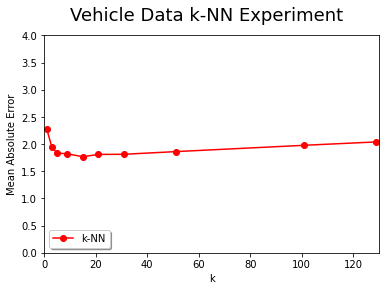

In [116]:
# Importing graphing package
import matplotlib.pyplot as plt
%matplotlib inline

#reload the data
data = pandas.read_csv('/content/drive/MyDrive/CS167/datasets/vehicles.csv')

# subsetting with the columns we want
subset =  data[(data['fuelType']=='Regular')][['year', 'cylinders', 'displ', 'comb08']]
subset.head()

# fill missing data here
cylinders_mean = subset['cylinders'].mean()
displ_mean = subset['displ'].mean()
subset['cylinders'].fillna(cylinders_mean, inplace=True)
subset['displ'].fillna(displ_mean, inplace=True)

# shuffle data
shuffled_data = subset.sample(frac=1, random_state = 41)

# Use the first 500 rows as testing data-- train with the rest
test_data = shuffled_data.iloc[0:500]
train_data = shuffled_data.iloc[500:]


# values of k to be tested
k_vals = [1,3,5,9,15,21,31,51,101,129,150,185]
kNN_MAE = []

# Calculating Mean Absolute Error for each value of k
for k in k_vals:
    predictions = regression_all_kNN(test_data,train_data,k)
    current_MAE = mean_absolute_error(test_data['comb08'],predictions)
    kNN_MAE.append(current_MAE)

print(kNN_MAE)

# Plotting results for each k value's MAE
plt.suptitle('Vehicle Data k-NN Experiment',fontsize=18)
plt.xlabel('k')
plt.ylabel('Mean Absolute Error')
plt.plot(k_vals,kNN_MAE,'ro-',label='k-NN')
plt.legend(loc='lower left', shadow=True)
plt.axis([0,130,0,4])

plt.show()

# 3 lowest MAE's at k = 15, 21, 31

## Exercise #4
Run the code you wrote in Exercise #3 for different splits of the data -- varying the number of elements in the testing data and/or different values for the `random_state`. 

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (70,71,72,73,74,76,79) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


[1.9, 1.8666666666666665, 1.8799999999999997, 1.7444444444444442, 1.6333333333333335, 1.3523809523809522, 1.387096774193548, 1.2960784313725484, 1.5475247524752478, 1.4286821705426358, 1.4386666666666668, 1.58]


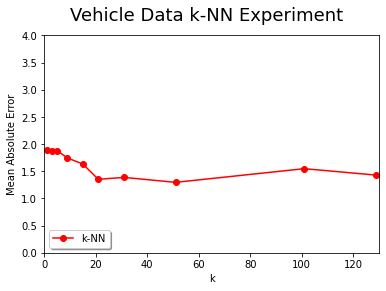

In [117]:
# TEST #1

# TESTING WITH DIFFERENT DATA SPLIT
#   10 rows for testing, rest of data for training
#reload the data
data = pandas.read_csv('/content/drive/MyDrive/CS167/datasets/vehicles.csv')

# subsetting with the columns we want
subset =  data[(data['fuelType']=='Regular')][['year', 'cylinders', 'displ', 'comb08']]
subset.head()

# fill missing data here
cylinders_mean = subset['cylinders'].mean()
displ_mean = subset['displ'].mean()
subset['cylinders'].fillna(cylinders_mean, inplace=True)
subset['displ'].fillna(displ_mean, inplace=True)

# shuffle data
shuffled_data = subset.sample(frac=1, random_state = 41)

# Use the first 10 rows as testing data-- train with the rest
test_data = shuffled_data.iloc[0:10]
train_data = shuffled_data.iloc[10:]


# values of k to be tested
k_vals = [1,3,5,9,15,21,31,51,101,129,150,185]
kNN_MAE = []

# Calculating Mean Absolute Error for each value of k
for k in k_vals:
    predictions = regression_all_kNN(test_data,train_data,k)
    current_MAE = mean_absolute_error(test_data['comb08'],predictions)
    kNN_MAE.append(current_MAE)

print(kNN_MAE)

# Plotting results for each k value's MAE
plt.suptitle('Vehicle Data k-NN Experiment',fontsize=18)
plt.xlabel('k')
plt.ylabel('Mean Absolute Error')
plt.plot(k_vals,kNN_MAE,'ro-',label='k-NN')
plt.legend(loc='lower left', shadow=True)
plt.axis([0,130,0,4])

plt.show()

# 3 lowest MAE's at k = 51, 21, 31

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (70,71,72,73,74,76,79) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


[2.11, 1.8026666666666664, 1.7691999999999999, 1.7244444444444444, 1.7190666666666665, 1.7366666666666666, 1.7663225806451615, 1.8294901960784313, 1.8496435643564355, 1.8910852713178294, 1.9365599999999998, 1.9832]


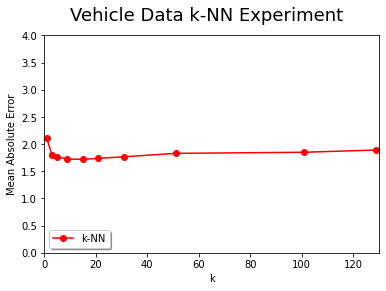

In [118]:
# TEST #2

# TESTING WITH DIFFERENT RANDOM STATE
#reload the data
data = pandas.read_csv('/content/drive/MyDrive/CS167/datasets/vehicles.csv')

# subsetting with the columns we want
subset =  data[(data['fuelType']=='Regular')][['year', 'cylinders', 'displ', 'comb08']]
subset.head()

# fill missing data here
cylinders_mean = subset['cylinders'].mean()
displ_mean = subset['displ'].mean()
subset['cylinders'].fillna(cylinders_mean, inplace=True)
subset['displ'].fillna(displ_mean, inplace=True)

# shuffle data
shuffled_data = subset.sample(frac=1, random_state = 25)

# Use the first 500 rows as testing data-- train with the rest
test_data = shuffled_data.iloc[0:500]
train_data = shuffled_data.iloc[500:]


# values of k to be tested
k_vals = [1,3,5,9,15,21,31,51,101,129,150,185]
kNN_MAE = []

# Calculating Mean Absolute Error for each value of k
for k in k_vals:
    predictions = regression_all_kNN(test_data,train_data,k)
    current_MAE = mean_absolute_error(test_data['comb08'],predictions)
    kNN_MAE.append(current_MAE)

print(kNN_MAE)

# Plotting results for each k value's MAE
plt.suptitle('Vehicle Data k-NN Experiment',fontsize=18)
plt.xlabel('k')
plt.ylabel('Mean Absolute Error')
plt.plot(k_vals,kNN_MAE,'ro-',label='k-NN')
plt.legend(loc='lower left', shadow=True)
plt.axis([0,130,0,4])

plt.show()

# 3 lowest MAE's at k = 15, 9, 21

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (70,71,72,73,74,76,79) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


[2.388, 1.9133333333333333, 1.7848000000000002, 1.7382222222222221, 1.7341333333333333, 1.7540952380952382, 1.848, 1.9409411764705882, 2.0355643564356436, 2.0228527131782945, 2.0178133333333332, 2.0344648648648653]


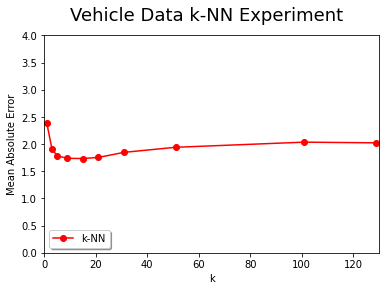

In [119]:
# TEST #3

# TESTING WITH ANOTHER DIFFERENT RANDOM STATE
#reload the data
data = pandas.read_csv('/content/drive/MyDrive/CS167/datasets/vehicles.csv')

# subsetting with the columns we want
subset =  data[(data['fuelType']=='Regular')][['year', 'cylinders', 'displ', 'comb08']]
subset.head()

# fill missing data here
cylinders_mean = subset['cylinders'].mean()
displ_mean = subset['displ'].mean()
subset['cylinders'].fillna(cylinders_mean, inplace=True)
subset['displ'].fillna(displ_mean, inplace=True)

# shuffle data
shuffled_data = subset.sample(frac=1, random_state = 36)

# Use the first 500 rows as testing data-- train with the rest
test_data = shuffled_data.iloc[0:250]
train_data = shuffled_data.iloc[250:]


# values of k to be tested
k_vals = [1,3,5,9,15,21,31,51,101,129,150,185]
kNN_MAE = []

# Calculating Mean Absolute Error for each value of k
for k in k_vals:
    predictions = regression_all_kNN(test_data,train_data,k)
    current_MAE = mean_absolute_error(test_data['comb08'],predictions)
    kNN_MAE.append(current_MAE)

print(kNN_MAE)

# Plotting results for each k value's MAE
plt.suptitle('Vehicle Data k-NN Experiment',fontsize=18)
plt.xlabel('k')
plt.ylabel('Mean Absolute Error')
plt.plot(k_vals,kNN_MAE,'ro-',label='k-NN')
plt.legend(loc='lower left', shadow=True)
plt.axis([0,130,0,4])

plt.show()

# 3 lowest MAE's at k = 15, 9, 21

# Exercise #5
What conclusions can you draw about the best number for k for the kNN algorithm for this dataset? Use a text cell to explain your conclusions in a couple sentences. 

# kNN Conclusions:

Along with the cross validation performed in Exercise #3, I also did 3 additional tests with the following modifications:


*   Test #1: changed data split. Testing data = first 10 rows, train with the rest
*   Test #2: changed random state
*   Test #3: changed data split and random state. Testing data = first 250 rows, train with the rest


I also took note of the 3 k-values for each test that produced the lowest MAE in order of lowest first because lower MAE is desired. Here are the results:


*   Original: k = 15, 21, 31
*   Test #1: k = 51, 21, 31
*   Test #2: k = 15, 9, 21
*   Test #3: k = 15, 9, 21


k = 21 occurred in the lowest MAE producing k-values in all 4 of the trials. Because of this, **I am determining that 21 (or a value very close to 21) is the ideal value for k in the kNN function** to produce the lowest Mean Absolute Error.


